## Importance Sampling

---
This tutorial is part of the course of Numerical Astrophysics (AGA5914), University of São Paulo (IAG/USP).

Details about the course can be found in the website:
  https://numericalastrophysics.wordpress.com/
  
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

We wish to compare several sampling methods. We will implement each of them individually as functions. 
For reproducibility, let's fix the seed of the (pseudo-)random number generator.

In [2]:
np.random.seed(42)

Among the sampling methods we have studied so far (inversion and rejection), importance sampling is the least straightforward. The underlying idea is that some points of the function are more important than others, in this sense. Thus, we can draw samples from a proposal distribution and reweight these sampled values to give highwer weights to values that are more typical:
$$f(x)dx = \dfrac{f(x)}{w(x)}w(x) dx.$$
This means that we can split a function $f(x)$ into a function that's easy to sample ($f(x)$), and adjust the weights ($w(x)$) accordingly:

$$\left\langle \dfrac{f(x)}{w(x)}  \right\rangle
= \dfrac{\int\limits_a^b \dfrac{f(x)}{w(x)} w(x) dx}{\int\limits_a^b w(x) dx} = \dfrac{\int\limits_a^b f(x)dx}{\int\limits_a^b w(x) dx} = \dfrac{I}{\int\limits_a^b w(x) dx}.$$
If we now rewrite only the term $I$, we obtain:
$$I = \left\langle \dfrac{f(x)}{w(x)}  \right\rangle
 \int\limits_a^b w(x) dx. $$
This can now be recast into a new probability distribution function, defined as:
$$p(x) = \dfrac{w(x)}{\int\limits_a^b w(x) dx}.$$

If we now draw a value $x_i$ from the distribution $p(x)$, we get:
$$\sum\limits_{i=1}^n  \dfrac{f(x_i)}{w(x_i)}  \approx \int\limits^b_a n p(x) \dfrac{f(x)}{w(x)} dx
= \int\limits^b_a n \dfrac{w(x)}{\int\limits_a^b w(y)dy} \dfrac{f(x)}{w(x)} dx,$$
and the weighted average can be written as:
$$\left\langle \dfrac{f(x)}{w(x)}  \right\rangle
= \dfrac{\int\limits_a^b \dfrac{f(x)}{w(x)} w(x) dx}{\int\limits_a^b w(x) dx} = \dfrac{\int\limits_a^b f(x)dx}{\int\limits_a^b w(x) dx} = \dfrac{I}{\int\limits_a^b w(x) dx}.$$
We can finally evaluate $I$:
$$I \approx \dfrac{1}{n} \sum\limits_{i=1}^n  \dfrac{f(x_i)}{w(x_i)}  \int\limits_a^b w(x)dx.$$

It is important to stress that $x_i$ must be sampled from $p(x)$!


We can now implement this algorithmically. Let's start by defining the function.

In [3]:
def importanceSampling(x, y, f, w, n):
    """
    Applies the importance sampling method to a given function.
    Here we split the function into f and w: int f(x)dx = int f(x) / w(x) * w(x) dx .
    This should be passed as an argument.
    """
    xmin = np.amin(x)
    xmax = np.amax(x)

    # This is the integral over w.
    # For simplicity, we use a simple trapezoidal rule for integration.
    norm = scipy.integrate.trapz(w, x = x)

    xsample = np.random.uniform(xmin, xmax, n)
    weights = norm * np.interp(xsample, x, y * w) / np.interp(xsample, x, w) 

    return xsample, weights

Now let's try out this sampling method using a simple function with a discontinuity:
$$ f(x) = \dfrac{\exp(-x^2)}{1-x}.$$
From the equations we have written before, it is reasonable to assume $w(x)=1-x$ and $f(x)=\exp(-x^2)$.
Below we define this (expected) function, and the we take $n$ samples from this distribution.

In [4]:
n = 10000
x = np.linspace(-3, 3, 10000)
y = np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)
f = np.exp(-x)
w = 1 - x
xs, w = importanceSampling(x, y, f, w, n)

Now we will plot the sampled points (xs, ys) and the analytic function.

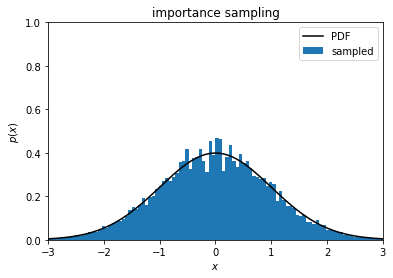

In [5]:
# Plotting the histogram with the data.
plt.plot(x, y, color = 'black', linestyle = 'solid', label = 'PDF') # original PDF
# plt.plot(x, f, color = 'grey', linestyle = 'dashed', label = 'f(x)')
# plt.plot(x, w, color = 'green', linestyle = 'dotted', label = 'w(x)')
plt.hist(xs, weights = w, bins = 100, density = True, label = 'sampled')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.title('importance sampling')
plt.axis([-3, 3, 0, 1.])
plt.legend()